In [2]:
# Import necessary modules 
import requests 
import json 
 
# Ask user for their Spotify token 
spotify_token = input("Please enter your Spotify token: ") 
 
# Set the necessary headers for the API request 
headers = { 
  "Accept": "application/json", 
  "Content-Type": "application/json", 
  "Authorization": f"Bearer {spotify_token}" 
}

In [3]:
# Send a GET request to the Spotify API to retrieve the last 5 songs listened 
response = requests.get("https://api.spotify.com/v1/me/player/recently-played?limit=5", headers=headers) 
 
# Check the status code of the response to make sure it was successful 
if response.status_code != 200: 
  print("There was an error retrieving the songs from Spotify.") 
 
# If the request was successful, parse the response data 
else: 
  data = json.loads(response.text) 
 
  # Loop through the list of songs and print their names 
  tracks = []

  for track in data["items"]: 
    tracks.append(track['track']['id'])
    print(f"Track: {track['track']['name']}")

print(tracks)

Track: No Surprises
Track: The Others
Track: New Dawn Fades - 2007 Remaster
Track: Superior State
Track: Me Persigue
['10nyNJ6zNy2YVYLrcwLccB', '59mJLb7Ksjp7U63j6c2PhQ', '5EabbLQZbdhCqG6aK9PFLU', '23cfyST2MDLRv590deCHjl', '6WGY8P7dBO33eKX95MruOY']


In [4]:
valence_values = []
arousal_values = []

for i in range(5):
    # Replace "SONG_ID" with the ID of the song you want to analyze
    song_id = tracks[i]

    # Make a GET request to the /audio-features endpoint of the Spotify Web API
    response = requests.get(
        f"https://api.spotify.com/v1/audio-features/{song_id}",
        headers={"Authorization": f"Bearer {spotify_token}"},
    )

    # Parse the response as JSON
    audio_features = response.json()

    # Print the valence and arousal values for the song
    valence_values.append(audio_features["valence"])
    arousal_values.append(audio_features["energy"])
    print("Valence:", audio_features["valence"])
    print("Arousal:", audio_features["energy"])

Valence: 0.118
Arousal: 0.393
Valence: 0.183
Arousal: 0.972
Valence: 0.258
Arousal: 0.525
Valence: 0.47
Arousal: 0.867
Valence: 0.741
Arousal: 0.723


<BarContainer object of 5 artists>

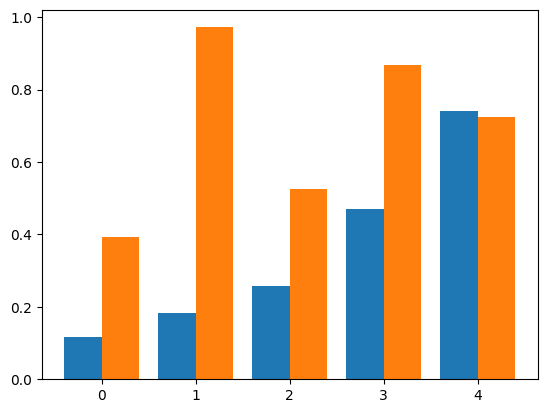

In [5]:
# Show results
import numpy as np
import matplotlib.pyplot as plt

X = ['Song 1', 'Song 2', 'Song 3', 'Song 4', 'Song 5']
  
X_axis = np.arange(len(X))

plt.figure()
plt.bar(X_axis - 0.2, valence_values, 0.4, label = 'Valence')
plt.bar(X_axis + 0.2, arousal_values, 0.4, label = 'Arousal')

In [6]:
# VA mapping 

import numpy as np
#from VAmapping import assign_colors_to_quadrants
from VAmapping import convert_range

coordinates = np.zeros((5,2))

for i in range(5):
    x = convert_range(valence_values[i])
    y = convert_range(arousal_values[i])
    coordinates[i, 0] = x
    coordinates[i, 1] = y

print(coordinates)

# x = coordinates[:, 0]
# y = coordinates[:, 1]
# RGBA_colors = assign_colors_to_quadrants(x, y)
# print(RGBA_colors)


# from VAmapping import plot_colors

# plot_colors(RGBA_colors)

[[-0.764 -0.214]
 [-0.634  0.944]
 [-0.484  0.05 ]
 [-0.06   0.734]
 [ 0.482  0.446]]


-0.5 0.5


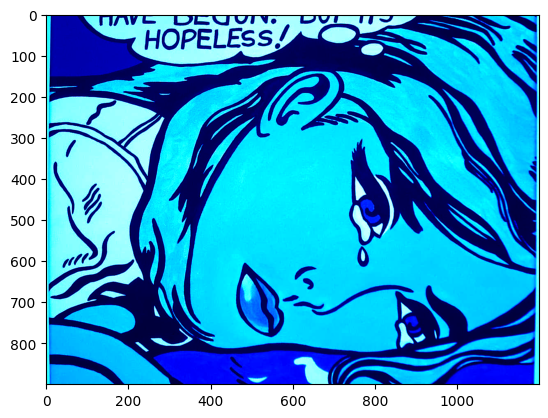

In [30]:
# x0 = coordinates[0, 0]
# y0 = coordinates[0, 1]
# x2 = coordinates[1, 0]
# y2 = coordinates[1, 1]
# x3 = coordinates[2, 0]
# y3 = coordinates[2, 1]
# x4 = coordinates[3, 0]
# y4 = coordinates[3, 1]
# x5 = coordinates[4, 0]
# y5 = coordinates[4, 1]

# x1 = mean([x0, x2, x3, x4, x5])
# y1 = mean([y0, y2, y3, y4, y5])

# print(x0, y0)    # old value (first value)
# print(x1, y1)    # mass centre

##########################################################

# x1 = coordinates[0, 0]
# y1 = coordinates[0, 1]

x1 = -0.5
y1 = 0.5

print(x1, y1)

import cv2

# load the image
img = cv2.imread('roy.jpeg')

## Change color palette of the image according to the quadrant of the VA plane

# Quadrant I: x > 0, y > 0
if x1 > 0 and y1 > 0:
    colormap = cv2.COLORMAP_SPRING # yellow/pink, euphoria
# Quadrant II: x < 0, y > 0
elif x1 < 0 and y1 > 0:
    colormap = cv2.COLORMAP_HOT #red/yellow, anger
# Quadrant III: x < 0, y < 0
elif x1 < 0 and y1 < 0:
    colormap = cv2.COLORMAP_OCEAN # blue, sadness  
# Quadrant IV: x > 0, y < 0
elif x1 > 0 and y1 < 0:
    colormap = cv2.COLORMAP_SUMMER #green, relax

# apply the new color map to the image
img = cv2.applyColorMap(img, colormap)

# show the resulting image
plt.imshow(img)

In [31]:
cv2.imwrite('style.png', img)

True